In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score ,mean_absolute_error
from sklearn import preprocessing
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
import matplotlib as mpl
import seaborn as sns
import joblib


Google Colab 載入drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Read CSV

In [6]:
#讀資料

# def detect_encoding(file_path):
#     rawdata = open(file_path, 'rb').read()
#     result = chardet.detect(rawdata)
#     return result['encoding']


# encoding = detect_encoding(file_path)
# df = pd.read_csv(file_path, encoding=encoding)

#NoPreSale 沒有預售屋
file_path = './model/cleaning/tpe_MLtest_500m_Clean_NoPreSale_before2023.csv'
df = pd.read_csv(file_path, encoding='big5')
tpe_housing_df = df.drop(columns=['Identifier','Type'])


# tpe_housing_df.head(5)



<Axes: xlabel='TransactionYear', ylabel='Count'>

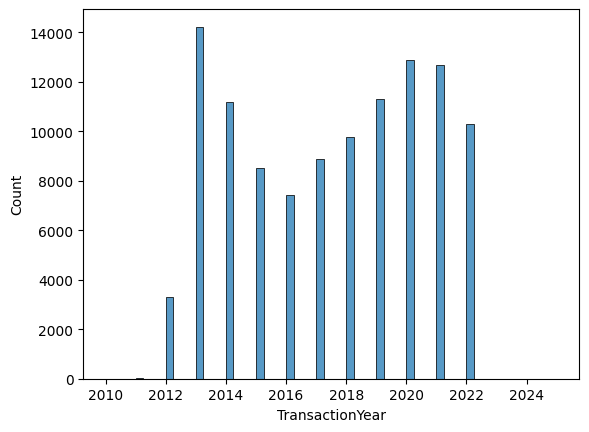

In [3]:

# 繪製北市房屋交易年分直方圖


sns.histplot(tpe_housing_df['TransactionYear'], binrange=(2010,2025))


<Axes: xlabel='Price_per_Area', ylabel='Count'>

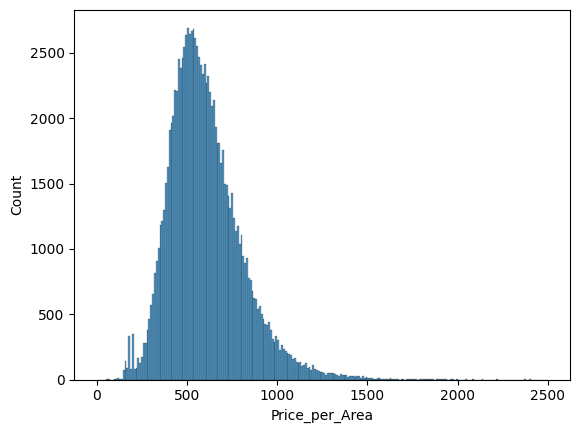

In [4]:
# 繪製北市房屋每坪房價(K/坪)直方圖

sns.histplot(tpe_housing_df['Price_per_Area'],binrange=(0,2500))


繪製HeatMap相關矩陣

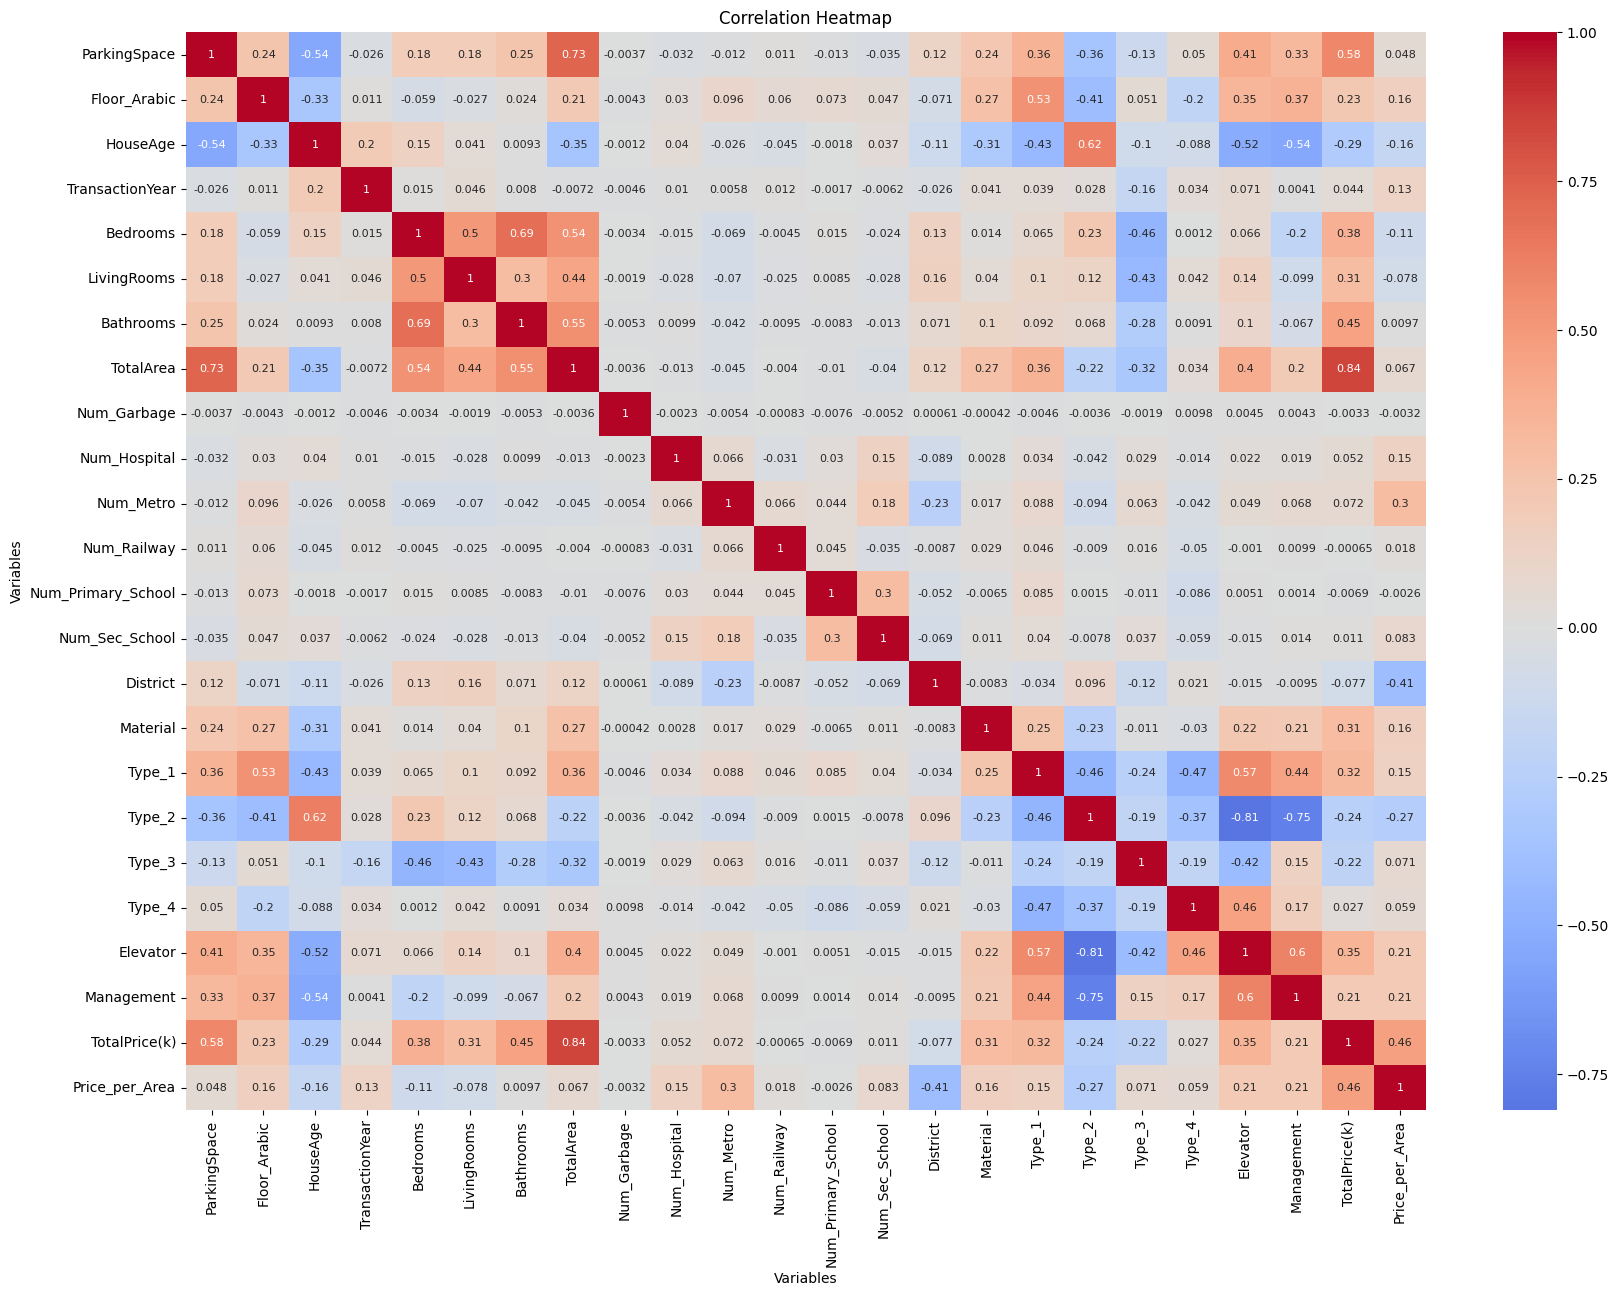

In [7]:
# drop TotalArea
tpe_housing_df=tpe_housing_df.drop(df.columns[24:36], axis=1)
tpe_housing_df = tpe_housing_df.drop(columns=['Land','Building','Storeys','Height','LandArea','PrimaryArea','ParkingArea','BalconyArea'])

tpe_housing_df.describe()

# 計算相關性矩陣
df_corr = tpe_housing_df.corr()

# 設置圖形大小
plt.figure(figsize=(20, 14))

# 調整顏色映射，例如使用 "coolwarm" 色彩映射
sns.heatmap(df_corr, center=0, annot=True, cmap="coolwarm",
            annot_kws={"size": 8})  # 設定相關係數文字大小為 8

# 添加標題和標籤
plt.title("Correlation Heatmap")
plt.xlabel("Variables")
plt.ylabel("Variables")


plt.show()

Lasso
Ridge
ElasticNet

In [8]:
# 分割訓練集和測試集

tpe_housing_X = tpe_housing_df.drop(columns=['TotalPrice(k)','Price_per_Area'])  # X變數，排除房屋價格列
tpe_housing_y = tpe_housing_df['Price_per_Area']  # Y變數，房屋每坪價格
print("tpe_housing_X shape: {}".format(tpe_housing_X.shape))
print("tpe_housing_y shape: {}".format(tpe_housing_y.shape))

tpe_housing_X_train, tpe_housing_X_test, tpe_housing_y_train, tpe_housing_y_test = train_test_split(tpe_housing_X, tpe_housing_y, test_size=0.2, random_state=10)

# 標準化
scaler = StandardScaler()

# 對X_train進行標準化
X_train_scaled = scaler.fit_transform(tpe_housing_X_train)

# 使用相同的標準化器對X_test進行標準化
X_test_scaled = scaler.transform(tpe_housing_X_test)

#Build model
model = linear_model.Lasso(alpha=0.1)
# model = linear_model.Ridge(alpha=1.0)
# model = linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5)

# Train the model using the training sets
model.fit(X_train_scaled, tpe_housing_y_train)



# Make predictions using the testing set
tpe_housing_y_pred = model.predict(X_test_scaled)

# # The coefficients
# print('Coefficients: {}\n'.format(model.coef_))
# Print每個變數的係數
for i, coef in enumerate(model.coef_):
    print("變數 {} 的係數: {:.2f}".format(tpe_housing_X.columns[i], coef))

# The mean squared error
print("Mean squared error: {}".format((mean_squared_error(tpe_housing_y_test, tpe_housing_y_pred))))
# Explained variance score: 1 is perfect prediction
print('R2 score: {}'.format(r2_score(tpe_housing_y_test, tpe_housing_y_pred)))
print('number of model coef: {}'.format(np.sum(model.coef_ != 0)))


tpe_housing_X shape: (110437, 22)
tpe_housing_y shape: (110437,)
變數 ParkingSpace 的係數: -32.79
變數 Floor_Arabic 的係數: 2.83
變數 HouseAge 的係數: -33.89
變數 TransactionYear 的係數: 28.94
變數 Bedrooms 的係數: -20.83
變數 LivingRooms 的係數: -0.87
變數 Bathrooms 的係數: 12.81
變數 TotalArea 的係數: 34.68
變數 Num_Garbage 的係數: -0.27
變數 Num_Hospital 的係數: 19.47
變數 Num_Metro 的係數: 38.91
變數 Num_Railway 的係數: -0.10
變數 Num_Primary_School 的係數: -7.33
變數 Num_Sec_School 的係數: 4.98
變數 District 的係數: -71.59
變數 Material 的係數: 12.01
變數 Type_1 的係數: -0.00
變數 Type_2 的係數: -9.76
變數 Type_3 的係數: 2.30
變數 Type_4 的係數: 7.64
變數 Elevator 的係數: 0.00
變數 Management 的係數: 8.62
Mean squared error: 28804.718122066875
R2 score: 0.3107278130088119
number of model coef: 20


選擇區


In [64]:
# 選擇 'District' 等於 'A' 的行
mask = tpe_housing_df['District'] == 116

# # 使用遮罩篩選 DataFrame，獲得只包含 'District' 為 'A' 的行
model_df = tpe_housing_df[mask]

# model_df=tpe_housing_df

print("model_rows shape: {}".format(model_df.shape))


print(model_df)



model_rows shape: (12415, 24)
        ParkingSpace  Floor_Arabic  HouseAge  TransactionYear  Bedrooms  \
4                  1            14         2             2012         3   
5                  0             3        40             2012         3   
22                 1             4         4             2012         4   
23                 0             3        17             2012         1   
41                 1             5         7             2012         2   
...              ...           ...       ...              ...       ...   
110430             1            15         0             2022         2   
110432             1            16         0             2022         4   
110433             1            29         0             2022         4   
110435             1            29         0             2022         2   
110436             1            28         0             2022         2   

        LivingRooms  Bathrooms  TotalArea  Num_Garbage  Num_Hospital 

RandomForest


In [65]:
# 分割訓練集和測試集

tpe_housing_X = model_df.drop(columns=['TotalPrice(k)','Price_per_Area','District'])  # X變數，排除房屋價格列
tpe_housing_y = model_df['Price_per_Area']  # Y變數，房屋價格
print("tpe_housing_X shape: {}".format(tpe_housing_X.shape))
print("tpe_housing_y shape: {}".format(tpe_housing_y.shape))

# tpe_housing_X_train, tpe_housing_X_test, tpe_housing_y_train, tpe_housing_y_test = train_test_split(tpe_housing_X, tpe_housing_y, test_size=0.2, random_state=42)

tpe_housing_X_train, tpe_housing_X_temp, tpe_housing_y_train, tpe_housing_y_temp = train_test_split(tpe_housing_X, tpe_housing_y, test_size=0.3, random_state=42)
tpe_housing_X_val, tpe_housing_X_test, tpe_housing_y_val, tpe_housing_y_test = train_test_split(tpe_housing_X_temp, tpe_housing_y_temp, test_size=0.5, random_state=42)

# 標準化器
scaler = StandardScaler()

# 對X_train進行標準化
X_train_scaled = scaler.fit_transform(tpe_housing_X_train)

# 使用相同的標準化對X_test進行標準化
X_test_scaled = scaler.transform(tpe_housing_X_test)

# 隨機森林回歸模型
rf_model = RandomForestRegressor(n_estimators=500,max_depth=7,n_jobs=-1,
    random_state=42)  # 設置隨機森林參數

# 在訓練集上訓練模型
rf_model.fit(tpe_housing_X_train, tpe_housing_y_train)


# Make predictions using the val set
tpe_housing_y_pred = rf_model.predict(tpe_housing_X_val)

# 計算均方誤差（MSE）
# 計算R²分數
mse = mean_squared_error(tpe_housing_y_val, tpe_housing_y_pred)
r2 = r2_score(tpe_housing_y_val, tpe_housing_y_pred)
mae = mean_absolute_error(tpe_housing_y_val, tpe_housing_y_pred)

# 使用验证集来评估模型性能
print("Validation Set Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"MAE: {mae}")

# Make predictions using the testing set
y_test_pred = rf_model.predict(tpe_housing_X_test)

mse_test = mean_squared_error(tpe_housing_y_test, y_test_pred)
r2_test = r2_score(tpe_housing_y_test, y_test_pred)
mae_test = mean_absolute_error(tpe_housing_y_test, y_test_pred)
# 使用测试集来最终评估模型性能
print("\nTest Set Performance:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"R² Score: {r2_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")


tpe_housing_X shape: (12415, 21)
tpe_housing_y shape: (12415,)
Validation Set Performance:
Mean Squared Error: 4812.51552353868
R² Score: 0.5470269778564106
MAE: 53.98897340334719

Test Set Performance:
Mean Squared Error (MSE): 5038.02225543528
R² Score: 0.5345166564828971
Mean Absolute Error (MAE): 53.85593020928843


In [66]:
# 分割訓練集和測試集

tpe_housing_X = model_df.drop(columns=['TotalPrice(k)','Price_per_Area','District'])  # X變數，排除房屋價格列
tpe_housing_y = model_df['Price_per_Area']  # Y變數，房屋價格
print("tpe_housing_X shape: {}".format(tpe_housing_X.shape))
print("tpe_housing_y shape: {}".format(tpe_housing_y.shape))

# tpe_housing_X_train, tpe_housing_X_test, tpe_housing_y_train, tpe_housing_y_test = train_test_split(tpe_housing_X, tpe_housing_y, test_size=0.2, random_state=42)
tpe_housing_X_train, tpe_housing_X_temp, tpe_housing_y_train, tpe_housing_y_temp = train_test_split(tpe_housing_X, tpe_housing_y, test_size=0.3, random_state=42)
tpe_housing_X_val, tpe_housing_X_test, tpe_housing_y_val, tpe_housing_y_test = train_test_split(tpe_housing_X_temp, tpe_housing_y_temp, test_size=0.5, random_state=42)

# 標準化器
scaler = StandardScaler()

# 對X_train進行標準化
X_train_scaled = scaler.fit_transform(tpe_housing_X_train)

# 使用相同的標準化對X_test進行標準化
X_test_scaled = scaler.transform(tpe_housing_X_test)

# XGBooste回歸模型
xgb_model = XGBRegressor(n_estimators=500,max_depth= 7,n_jobs = -1,
    learning_rate = 0.1 ,random_state=42)  # 設XGBooster參數

# 在訓練集上訓練模型
xgb_model.fit(tpe_housing_X_train, tpe_housing_y_train)

# Make predictions using the val set
tpe_housing_y_pred = xgb_model.predict(tpe_housing_X_val)

# 計算均方誤差（MSE）
# 計算R²分數
mse = mean_squared_error(tpe_housing_y_val, tpe_housing_y_pred)
r2 = r2_score(tpe_housing_y_val, tpe_housing_y_pred)
mae = mean_absolute_error(tpe_housing_y_val, tpe_housing_y_pred)

# 使用验证集来评估模型性能
print("Validation Set Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"MAE: {mae}")

# Make predictions using the testing set
y_test_pred = xgb_model.predict(tpe_housing_X_test)

mse_test = mean_squared_error(tpe_housing_y_test, y_test_pred)
r2_test = r2_score(tpe_housing_y_test, y_test_pred)
mae_test = mean_absolute_error(tpe_housing_y_test, y_test_pred)
# 使用测试集来最终评估模型性能
print("\nTest Set Performance:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"R² Score: {r2_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")


tpe_housing_X shape: (12415, 21)
tpe_housing_y shape: (12415,)
Validation Set Performance:
Mean Squared Error: 3220.1314894309926
R² Score: 0.6969084701476973
MAE: 42.252938865653114

Test Set Performance:
Mean Squared Error (MSE): 3710.676946147087
R² Score: 0.657155482046368
Mean Absolute Error (MAE): 43.03496606344406


儲存model

In [67]:
joblib.dump(xgb_model, './model/cleaning/tpe_v0/xgb_model_tpe_116.pkl')

['./model/cleaning/tpe_v0/xgb_model_tpe_116.pkl']